In [48]:
import matplotlib.pyplot as plt
import cv2
import numpy as np

In [49]:
im = cv2.imread('./cat.jpg')

In [50]:
print(im.shape)

(549, 976, 3)


In [51]:
im = cv2.cvtColor(im,cv2.COLOR_BGR2RGB)

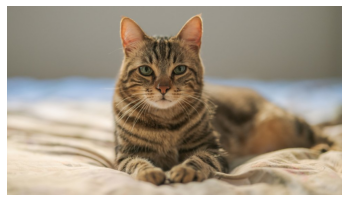

In [52]:
plt.imshow(im)
plt.axis(False)
plt.show()

In [53]:
all_pixels = im.reshape((-1,3))
all_pixels.shape
original = all_pixels.shape[0]

In [54]:
dominant_color = 4

In [55]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters=dominant_color)

In [56]:
km.fit(all_pixels)

KMeans(n_clusters=4)

In [57]:
km.cluster_centers_

array([[ 78.79247042,  61.15905854,  40.51971725],
       [154.58758828, 146.5280949 , 131.18476129],
       [213.27992483, 203.40113162, 189.67155865],
       [130.87906006, 108.43690985,  81.11668887]])

In [58]:
centres = km.cluster_centers_

In [59]:
centres = np.array(centres,dtype='uint8')

### Plot what colors are they ?

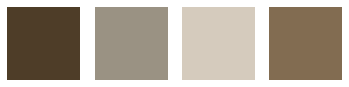

In [60]:
i = 1;
plt.Figure(figsize=(4,2))
color = []

for each_color in centres:
    plt.subplot(1,4,i)
    plt.axis(False)
    i+=1
    color.append(each_color)
    a = np.zeros((100,100,3),dtype='uint8')
    a[:,:,:] = each_color
    plt.imshow(a)
plt.show()

### Segmenting our Image

In [61]:
new_image = np.zeros((549*976, 3),dtype='uint8')

In [62]:
new_image.shape

(535824, 3)

In [63]:
color

[array([78, 61, 40], dtype=uint8),
 array([154, 146, 131], dtype=uint8),
 array([213, 203, 189], dtype=uint8),
 array([130, 108,  81], dtype=uint8)]

In [65]:
km.labels_

array([1, 1, 1, ..., 2, 2, 2])

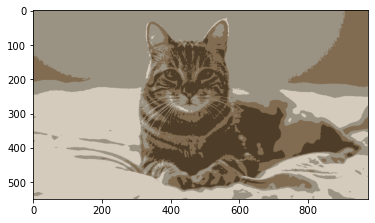

In [66]:
for ix in range(new_image.shape[0]):
    new_image[ix] = color[km.labels_[ix]]
new_image = new_image.reshape((549, 976, 3))
plt.imshow(new_image)
plt.show()